Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473


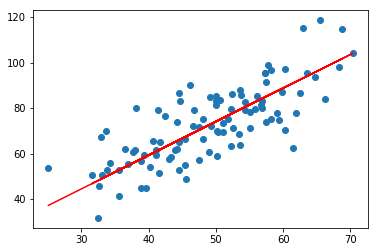

In [5]:
#using the code from llSourcell/Intro_to_the_Math_of_intelligence
#-----------------------------------------------------------------
#The optimal values of m and b can be actually calculated with way less effort than doing a linear regression. 
#this is just to demonstrate gradient descent

import numpy  as np;
from numpy import *;
import matplotlib.pylab as pyl;

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    x3 = [0 for i in range(num_iterations)];
    y3 = [0 for i in range(num_iterations)];
    z3 = [0 for i in range(num_iterations)];
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        x3[i] = b;
        z3[i] = compute_error_for_line_given_points(b, m, points)
        y3[i] = m;
        
    return [b, m,x3,y3,z3]

def run():
    
    points = genfromtxt("data.csv", delimiter=",")
    
    
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m,x3,y3,z3] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    
    plotLinear(points,b,m)

    
def plotLinear(points,b,m):
    x = [0 for i in range(len(points))]  
    y = [0 for i in range(len(points))]
    for i in range(0, len(points)):
        x[i]= points[i, 0]
        y[i] = points[i, 1]
    x1 = np.array(x);    
    y1 = np.array(y);
    y2 = b+m*x1;

    pyl.plot(x1,y1,'o')
    pyl.plot(x1,y2,'r');
    #pyl.subplot(1,2,2);
    #totalError = (y1 - (m * x1 + b)) ** 2
    #pyl.plot(totalError);
    
def plotError(x3,y3):
    pyl.xlabel("b")
    pyl.ylabel("Error")
    pyl.grid()
    pyl.subplot(2,2,2);
    pyl.plot(x3,y3);
    
    
if __name__ == '__main__':
    run()
    